# Desafio EDA

Dessa base, analise e extraia:

- Tipos de dados disponíveis
- Período da análise feita
- Tamanho da base de dados
- Verificar dados nulos
- Outliers

## Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import zscore
import sweetviz as sv
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#Configurações de Exibição
pd.set_option('display.max_seq_items', None)  # Exibe todas as entradas em listas e arrays
pd.set_option('display.max_rows', None)  # Exibe todas as linhas
pd.set_option('display.max_columns', None)  # Exibe todas as colunas
pd.set_option('display.max_colwidth', None) # Exibe todo o conteúdo da célula

# Toda vez que trabalhar com número científico, podemos tranformar em um decimal para ficar mais coompreensivo
pd.set_option('display.float_format', lambda x: '%.15f' % x)

## Carregando o Dataframe e renomeando as colunas

In [43]:
df_netflix = pd.read_csv('./datasets/netflix_daily_top_10.csv')
df_netflix.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [ ]:
# Renomeando as colunas do DataFrame df_netflix
df_netflix.rename(columns={
    'As of': 'Até',
    'Rank': 'Posição',
    'Year to Date Rank': 'Posição no Ano',
    'Last Week Rank': 'Posição na Semana Passada',
    'Title': 'Título',
    'Type': 'Tipo',
    'Netflix Exclusive': 'Exclusivo Netflix',
    'Netflix Release Date': 'Data de Lançamento Netflix',
    'Days In Top 10': 'Dias no Top 10',
    'Viewership Score': 'Pontuação de Audiência'
}, inplace=True)

# Verificando as novas colunas
df_netflix.head()

## Resolvendo os exercícios

- Tipos de dados disponíveis - OK
- Tamanho da base de dados - OK
- Período da análise feita - 
- Verificar dados nulos - OK
- Outliers - 


### Tipos de dados disponíveis E Verificar Dados Nulos

In [81]:
# Verificando as novas colunas
df_netflix.head()

,Até,Posição,Posição no Ano,Posição na Semana Passada,Título,Tipo,Exclusivo Netflix,Data de Lançamento Netflix,Dias no Top 10,Pontuação de Audiência
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,9,90
1,2020-04-01,2,2,0,Ozark,TV Show,Yes,2017-07-21,5,45
2,2020-04-01,3,3,2,All American,TV Show,No,2019-03-28,9,76
3,2020-04-01,4,4,0,Blood Father,Movie,No,2020-03-26,5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,2020-03-20,9,55


In [82]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Até                         7100 non-null   datetime64[ns]
 1   Posição                     7100 non-null   int64         
 2   Posição no Ano              7100 non-null   int64         
 3   Posição na Semana Passada   7100 non-null   int64         
 4   Título                      7100 non-null   object        
 5   Tipo                        7100 non-null   object        
 6   Exclusivo Netflix           7100 non-null   object        
 7   Data de Lançamento Netflix  7100 non-null   datetime64[ns]
 8   Dias no Top 10              7100 non-null   int64         
 9   Pontuação de Audiência      7100 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 554.8+ KB


#### Coluna Até

In [53]:
# Converter a coluna 'Até' para o formato de data
df_netflix['Até'] = pd.to_datetime(df_netflix['Até'], format='%Y-%m-%d', errors='coerce')

#### Coluna Posição no Ano

In [55]:
df_netflix['Posição no Ano'].value_counts(dropna=False)

Posição no Ano
0     859
1     708
2     708
3     706
4     705
5     699
6     675
7     633
8     554
9     481
10    372
Name: count, dtype: int64

In [54]:
df_netflix['Posição no Ano'] = df_netflix['Posição no Ano'].str.strip().replace('-', 0)

In [56]:
df_netflix['Posição no Ano'] = df_netflix['Posição no Ano'].astype('int64')

#### Coluna Posição na Semana Passada

In [60]:
df_netflix['Posição na Semana Passada'].value_counts(dropna=False)

Posição na Semana Passada
0     3968
1      653
2      564
3      452
4      336
5      282
6      240
7      193
8      167
9      133
10     112
Name: count, dtype: int64

In [59]:
df_netflix['Posição na Semana Passada'] = df_netflix['Posição na Semana Passada'].str.strip().replace('-', 0)

In [61]:
df_netflix['Posição na Semana Passada'] = df_netflix['Posição na Semana Passada'].astype('int64')

#### Coluna Exclusivo Netflix 

In [70]:
df_netflix['Exclusivo Netflix'].value_counts(dropna=False)

Exclusivo Netflix
Yes    4599
NaN    2501
Name: count, dtype: int64

In [72]:
# Substituir valores nulos na coluna 'Exclusivo Netflix' por 'No'
df_netflix['Exclusivo Netflix'] = df_netflix['Exclusivo Netflix'].fillna('No')

#### Coluna Data de Lançamento Netflix

In [77]:
# Converter a coluna 'Data de Lançamento Netflix' para o tipo datetime
df_netflix['Data de Lançamento Netflix'] = pd.to_datetime(df_netflix['Data de Lançamento Netflix'], format='%b %d, %Y', errors='coerce')

#### Tamanho da base de dados

In [84]:
df_netflix.shape

(7100, 10)

#### Período da análise feita

In [98]:
min_date = df_netflix['Data de Lançamento Netflix'].min()
max_date = df_netflix['Data de Lançamento Netflix'].max()

periodo = max_date - min_date
print(f"O período do DataFrame é de {periodo.days} dias.")

O período do DataFrame é de 5527 dias.


#### Outliers

In [86]:
df_netflix.columns

Index(['Até', 'Posição', 'Posição no Ano', 'Posição na Semana Passada',
       'Título', 'Tipo', 'Exclusivo Netflix', 'Data de Lançamento Netflix',
       'Dias no Top 10', 'Pontuação de Audiência'],
      dtype='object')

<Axes: >

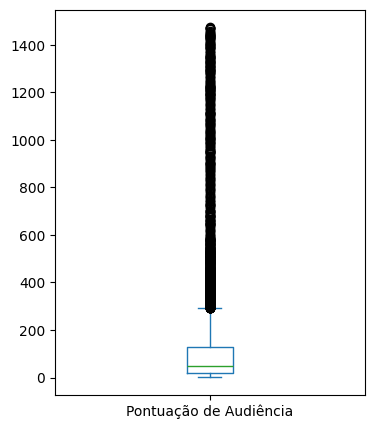

In [89]:
ax = df_netflix['Pontuação de Audiência'].plot.box()
ax.figure.set_size_inches(4, 5)
ax

<Axes: ylabel='Frequency'>

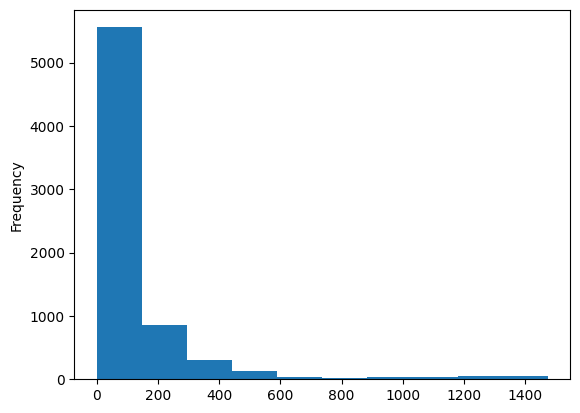

In [91]:
df_netflix['Pontuação de Audiência'].plot.hist()

##### Tukey (Distribuição Não Normal)

In [93]:
# IQR = 3º quartil - 1º quartil
# IQR = $ 1906.4
q1_pontuacao_audiencia = df_netflix['Pontuação de Audiência'].quantile(0.25)
q3_pontuacao_audiencia = df_netflix['Pontuação de Audiência'].quantile(0.75)
iqr_pontuacao_audiencia = q3_pontuacao_audiencia - q1_pontuacao_audiencia
iqr_pontuacao_audiencia

109.0

In [94]:
# Calcular Limite Inferior e Superior
limInf_pontuacao_audiencia = q1_pontuacao_audiencia - (iqr_pontuacao_audiencia * 1.5)
limSup_pontuacao_audiencia = q3_pontuacao_audiencia + (iqr_pontuacao_audiencia * 1.5)
limInf_pontuacao_audiencia, limSup_pontuacao_audiencia

(-144.5, 291.5)

In [ ]:
# A quantidade de outliers, ou seja, bolinhas abaixo do Limite Inferior ou acima do Limite Superior resultou em 698 em um total de 7100 registros
qtde_outliers = df_netflix[(df_netflix['Pontuação de Audiência'] < limInf_pontuacao_audiencia) | (df_netflix['Pontuação de Audiência'] > limSup_pontuacao_audiencia)]
df_netflix.shape[0], qtde_outliers.shape[0]

(7100, 698)

##### ZScore (Distribuição normal)

In [101]:
# Usando o método zscore do scipy
# Desvios padrões maiores que 3, sendo negatio ou possitivo, é uma boa referência para definir se é outlier ou não
z_score = zscore(df_netflix['Pontuação de Audiência'])

In [102]:
# Simplificando convertendo para valores absolutos removendo os sinais
z_score = np.abs(zscore(df_netflix['Pontuação de Audiência']))

In [103]:
# Quais são os outliers do churn contratos mensais
df_netflix[z_score > 3.0].shape[0]

201